In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Basic info of the datatset
print("Dataset Shape:", df.shape)
print("\nData Types and Non-Null Counts:")
print(df.info())

Dataset Shape: (15120, 56)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wildern

In [4]:
# Check for missing values
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [5]:
# Target variable distribution
print("\nTarget Variable Distribution (Cover_Type):")
print(df['Cover_Type'].value_counts().sort_index())


Target Variable Distribution (Cover_Type):
Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64


In [6]:
# Statistical description of numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Id', 'Cover_Type'])
print("\nStatistical Summary of Numeric Features:")
print(df[numeric_cols].describe())



Statistical Summary of Numeric Features:
          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000         

In [8]:
# Separate feature types
continuous_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                       'Horizontal_Distance_To_Fire_Points']

wilderness_features = [col for col in df.columns if 'Wilderness_Area' in col]
soil_features = [col for col in df.columns if 'Soil_Type' in col]

print("\nContinuous Features:", continuous_features)
print("\nWilderness Area Features:", wilderness_features)
print("\nSoil Type Features:", soil_features)




Continuous Features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

Wilderness Area Features: ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

Soil Type Features: ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [9]:
# Check for soil types and wilderness areas with no samples
print("\nWilderness area non-zero sample counts:")
for col in wilderness_features:
    print(f"{col}: {df[col].sum()}")

print("\nSoil types non-zero sample counts:")
for col in soil_features:
    count = df[col].sum()
    if count > 0:
        print(f"{col}: {count}")



Wilderness area non-zero sample counts:
Wilderness_Area1: 3597
Wilderness_Area2: 499
Wilderness_Area3: 6349
Wilderness_Area4: 4675

Soil types non-zero sample counts:
Soil_Type1: 355
Soil_Type2: 623
Soil_Type3: 962
Soil_Type4: 843
Soil_Type5: 165
Soil_Type6: 650
Soil_Type8: 1
Soil_Type9: 10
Soil_Type10: 2142
Soil_Type11: 406
Soil_Type12: 227
Soil_Type13: 476
Soil_Type14: 169
Soil_Type16: 114
Soil_Type17: 612
Soil_Type18: 60
Soil_Type19: 46
Soil_Type20: 139
Soil_Type21: 16
Soil_Type22: 345
Soil_Type23: 757
Soil_Type24: 257
Soil_Type25: 1
Soil_Type26: 54
Soil_Type27: 15
Soil_Type28: 9
Soil_Type29: 1291
Soil_Type30: 725
Soil_Type31: 332
Soil_Type32: 690
Soil_Type33: 616
Soil_Type34: 22
Soil_Type35: 102
Soil_Type36: 10
Soil_Type37: 34
Soil_Type38: 728
Soil_Type39: 657
Soil_Type40: 459


In [10]:
# Remove soil features with zero samples if any found (for example we can observe that Soil Type 15 isn't mentioned abovw)
zero_soil_features = [col for col in soil_features if df[col].sum() == 0]
if zero_soil_features:
    print("\nRemoving soil type features with zero counts:", zero_soil_features)
    df.drop(columns=zero_soil_features, inplace=True)
    soil_features = [col for col in soil_features if col not in zero_soil_features]



Removing soil type features with zero counts: ['Soil_Type7', 'Soil_Type15']


In [11]:
# Statistical summary of continuous features
print("\nSummary statistics for continuous features:")
print(df[continuous_features].describe())



Summary statistics for continuous features:
          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000      

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Define feature groups
continuous_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                       'Horizontal_Distance_To_Fire_Points']



In [14]:
wilderness_features = [col for col in df.columns if 'Wilderness_Area' in col]
soil_features = [col for col in df.columns if 'Soil_Type' in col]


In [15]:
# Prepare input features and target
X = df[continuous_features + wilderness_features + soil_features]
y = df['Cover_Type']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale continuous features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])



In [18]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8571
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.79      0.66      0.72       432
           3       0.84      0.81      0.83       432
           4       0.95      0.97      0.96       432
           5       0.89      0.94      0.91       432
           6       0.82      0.89      0.85       432
           7       0.93      0.96      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



In [19]:
# Print numeric confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Numeric):")
print(cm)


Confusion Matrix (Numeric):
[[331  64   1   0   9   1  26]
 [ 78 286  12   0  36  16   4]
 [  0   2 350  18   7  55   0]
 [  0   0   6 419   0   7   0]
 [  0   9   9   0 408   6   0]
 [  0   3  38   6   1 384   0]
 [ 18   0   0   0   0   0 414]]


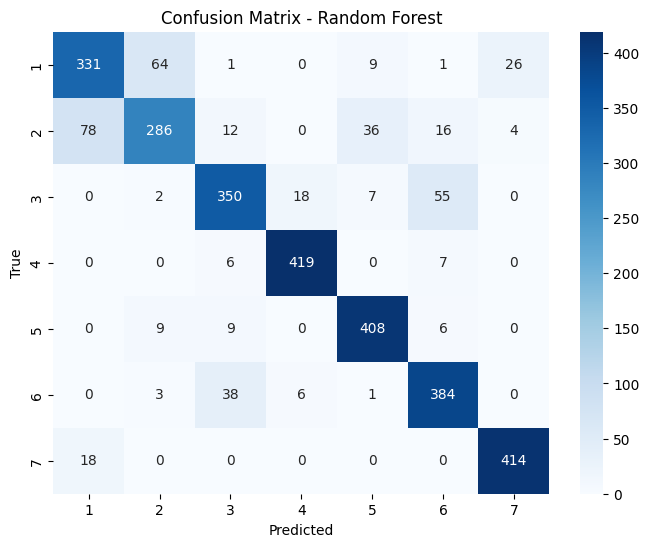

In [20]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [21]:
import joblib

# Save the model
model_filename = 'forest_cover_rf_model.joblib'
joblib.dump(rf, model_filename)
print(f"Model saved to {model_filename}")


Model saved to forest_cover_rf_model.joblib


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [24]:
# Predict
y_pred_gb = gb.predict(X_test_scaled)

In [25]:
# Accuracy
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Test Accuracy: {acc_gb:.4f}")


Gradient Boosting Test Accuracy: 0.7870


In [26]:
# Classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.70      0.71       432
           2       0.71      0.55      0.62       432
           3       0.71      0.69      0.70       432
           4       0.93      0.95      0.94       432
           5       0.79      0.89      0.84       432
           6       0.72      0.77      0.74       432
           7       0.90      0.95      0.93       432

    accuracy                           0.79      3024
   macro avg       0.78      0.79      0.78      3024
weighted avg       0.78      0.79      0.78      3024



The Random Forest model performed better than Gradient Boosting for the forest cover prediction task, achieving around 85.7% test accuracy compared to 79% for Gradient Boosting.

Key insights:
	•	Random Forest showed higher precision and recall especially in classes 3 (Ponderosa Pine), 4 (Cottonwood/Willow), 5 (Aspen), 6 (Douglas-fir), and 7 (Krummholz).
	•	Gradient Boosting had lower recall and f1 scores overall.
	•	Confusion matrix shows Random Forest makes fewer misclassifications overall.